Practice ANN. Styled after Book Example in Ch 10-ageron

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
y_train_full.shape

(60000,)

In [9]:
y_train_full.dtype

dtype('uint8')

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_valid, X_train= X_train_full[ : 5000]/255, X_train_full [5000 :]/255

In [12]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [13]:
y_valid[1:5]

array([0, 0, 3, 0], dtype=uint8)

In [14]:
import matplotlib.pyplot as plt

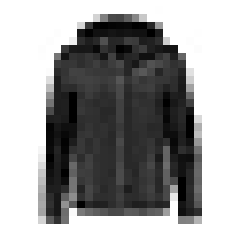

In [15]:
plt.imshow (X_train[0], cmap = 'binary' )
plt.axis ('off')
plt.show ()

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names [y_train[1]]

'T-shirt/top'

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
import numpy as np

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model.layers

In [23]:
model.summary ()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________


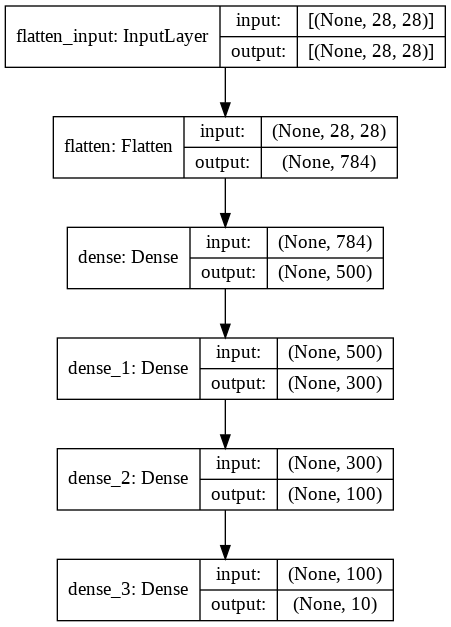

In [24]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [25]:
hidden1 = model.layers[1]
# This is the first hidden layer with 300 neurons

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights

array([[ 0.02224506,  0.03083178, -0.0122686 , ...,  0.04847746,
        -0.00316433, -0.01515578],
       [-0.02759417, -0.01118364,  0.0507398 , ..., -0.04399914,
         0.00565013, -0.05193627],
       [ 0.06655311,  0.03664307, -0.05802352, ...,  0.00892484,
        -0.02207562, -0.02662601],
       ...,
       [-0.0371199 , -0.027876  , -0.06116788, ...,  0.03094938,
        -0.0232155 , -0.05285604],
       [ 0.03409466, -0.06670204, -0.01421629, ...,  0.04793852,
        -0.0673712 ,  0.04170242],
       [ 0.00733708, -0.02191466, -0.04088402, ...,  0.02908415,
         0.06602233,  0.02880167]], dtype=float32)

In [28]:
weights.shape

(784, 500)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(500,)

In [31]:
y_valid
# Here y_valid is not onehot encoded. Hence sparse categorical cross entropy is used.

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [32]:
model.compile (loss = "sparse_categorical_crossentropy", 
               optimizer = "adam",
               metrics = ["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4845 - accuracy: 0.8251 - val_loss: 0.3607 - val_accuracy: 0.8706
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8644 - val_loss: 0.3878 - val_accuracy: 0.8630
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3314 - accuracy: 0.8777 - val_loss: 0.3257 - val_accuracy: 0.8838
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3058 - accuracy: 0.8872 - val_loss: 0.3068 - val_accuracy: 0.8890
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2882 - accuracy: 0.8932 - val_loss: 0.3114 - val_accuracy: 0.8870
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2722 - accuracy: 0.8988 - val_loss: 0.3627 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2620 - accuracy: 0.9015 - val_loss: 0.3116 - val_accuracy:

In [34]:
# model.save('ANN_fashion-minst-1.h5')

# from google.colab import files
# files.download('ANN_fashion-minst-1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
import pandas as pd
import os
from google.colab import files
from pylab import savefig
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    files.download(path)

Saving figure keras_learning_curves_plot-1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

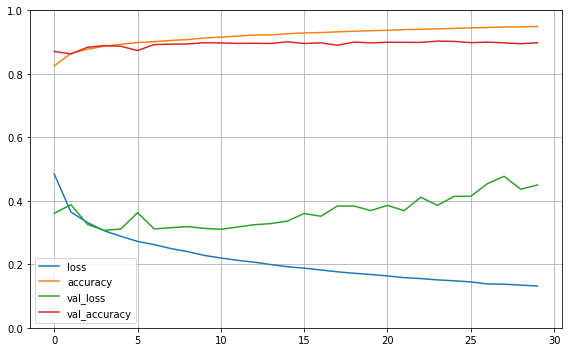

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot-1")
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5049 - accuracy: 0.8901


[0.5049083232879639, 0.8901000022888184]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
# y_pred = model.predict_classes(X_new)
# y_pred

In [43]:
y_pred1 = np.argmax(model.predict(X_new), axis=-1)

In [44]:
y_pred1

array([9, 2, 1])

In [47]:
# np.array(class_names)[y_pred]

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

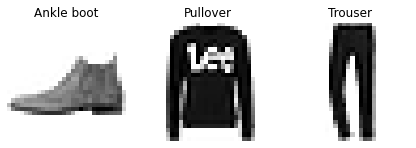

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

Now include regularization

In [50]:
!git clone https://github.com/nopynospy/apu_deep_learning.git

Cloning into 'apu_deep_learning'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 84 (delta 34), reused 34 (delta 6), pack-reused 0
Unpacking objects: 100% (84/84), done.


In [51]:
!cd apu_deep_learning/
!ls

ANN_fashion-minst-1.h5	keras_learning_curves_plot-1.png  sample_data
apu_deep_learning	my_fashion_mnist_model.png


In [52]:
model_fashion_minst1 = keras.models.load_model('ANN_fashion-minst-1.h5')
model_fashion_minst1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 573,910
Trainable params: 573,910
Non-trainable params: 0
_________________________________________________________________
